<a href="https://colab.research.google.com/github/gitenterpriseengineer/Data-Structure-Algorithm-Programs/blob/master/FoodHub_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [1]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [5]:
# Write your code here to view the first 5 rows
display(df.head(5))

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
print(df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

(1898, 9)
Number of rows: 1898
Number of columns: 9


#### Observations:
There are roughly 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:
Rating is a float but there are some "Not Given" values

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [9]:

# Convert 'rating' to numeric,  also forces not given values to be converted to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Get mode and Impute missing 'rating' values with the mode
mode_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(mode_rating)

#We can see that now the value counts add to total 1898
print("\nValue counts of rating after treatment:")
print(df['rating'].value_counts())


Value counts of rating after treatment:
rating
5.0    1324
4.0     386
3.0     188
Name: count, dtype: int64


#### Observations:
Rating is missing in 736 rows

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
print("Stat of the Data:")
display(df.describe())

min = df['food_preparation_time'].min()
avg = df['food_preparation_time'].mean()
max = df['food_preparation_time'].max()

print(f"\nMinimum food preparation time: {min} minutes")
print(f"Average food preparation time: {avg:.2f} minutes")
print(f"Maximum food preparation time: {max} minutes")

Stat of the Data:


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.598525,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.662289,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000



Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


#### Observations:
Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
original_df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
num_not_rated_original = (original_df['rating'] == 'Not given').sum()
print(f"Number of orders originally not rated: {num_not_rated_original}")

Number of orders originally not rated: 736


#### Observations:
Number of orders originally not rated: 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

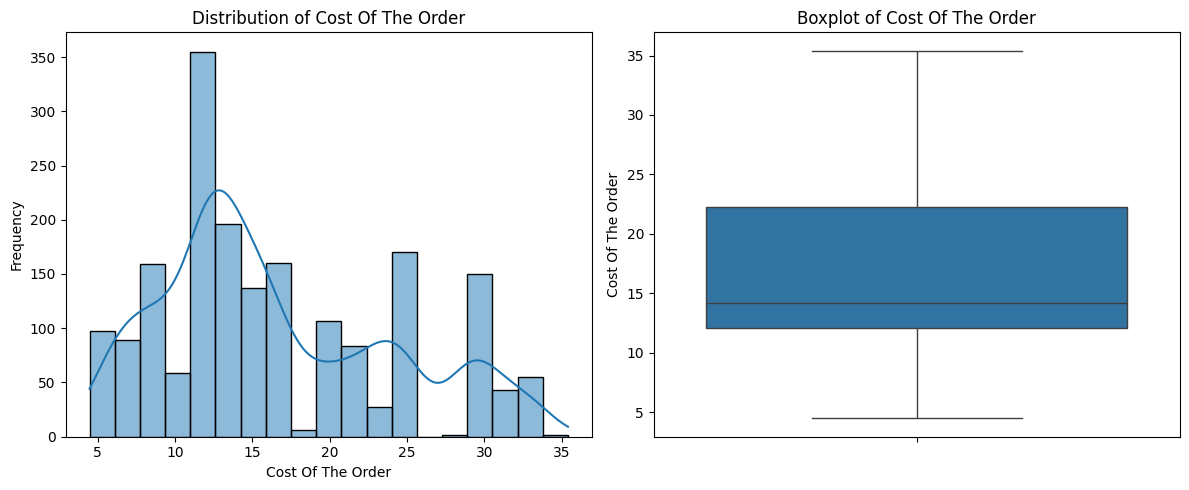

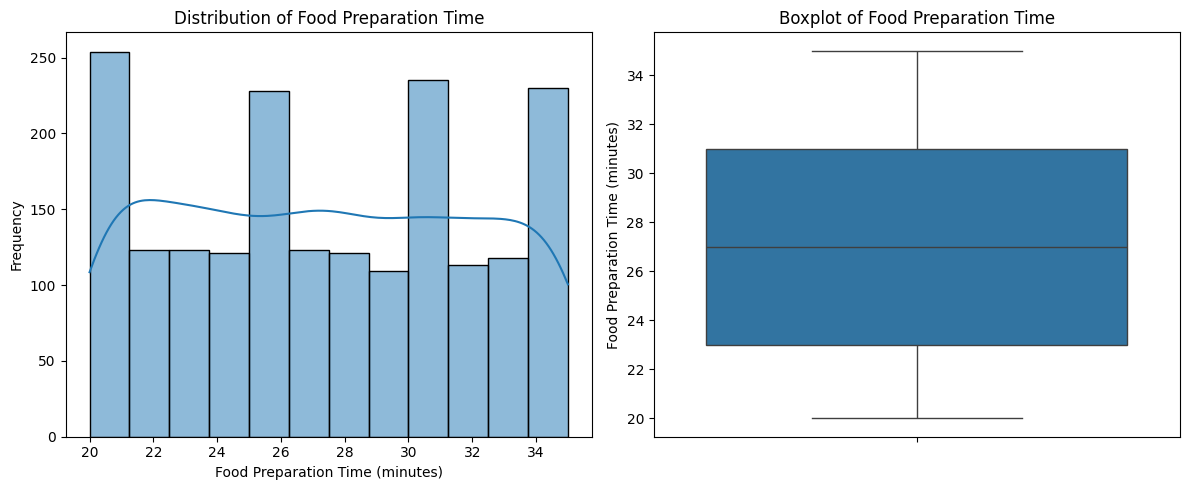

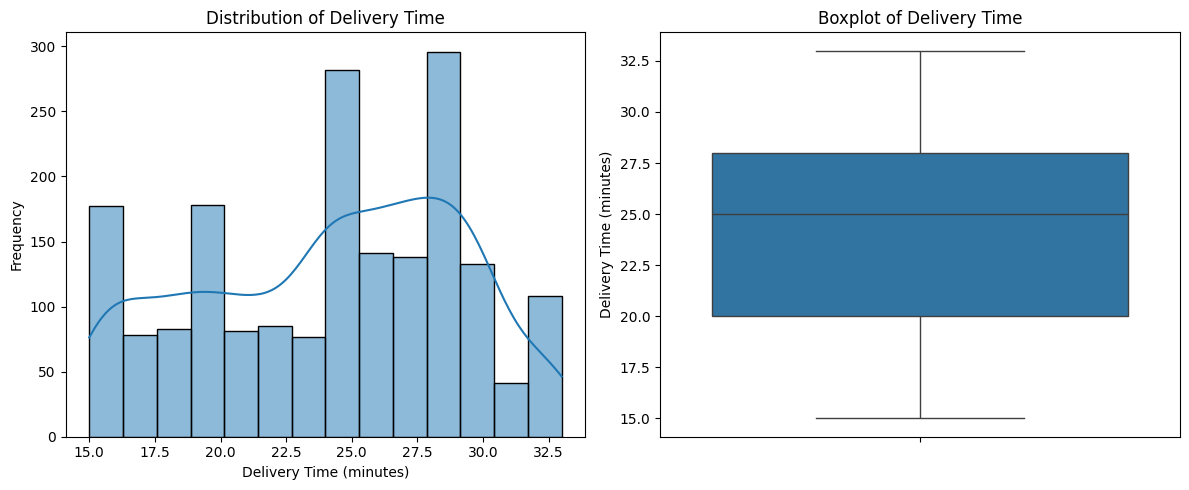

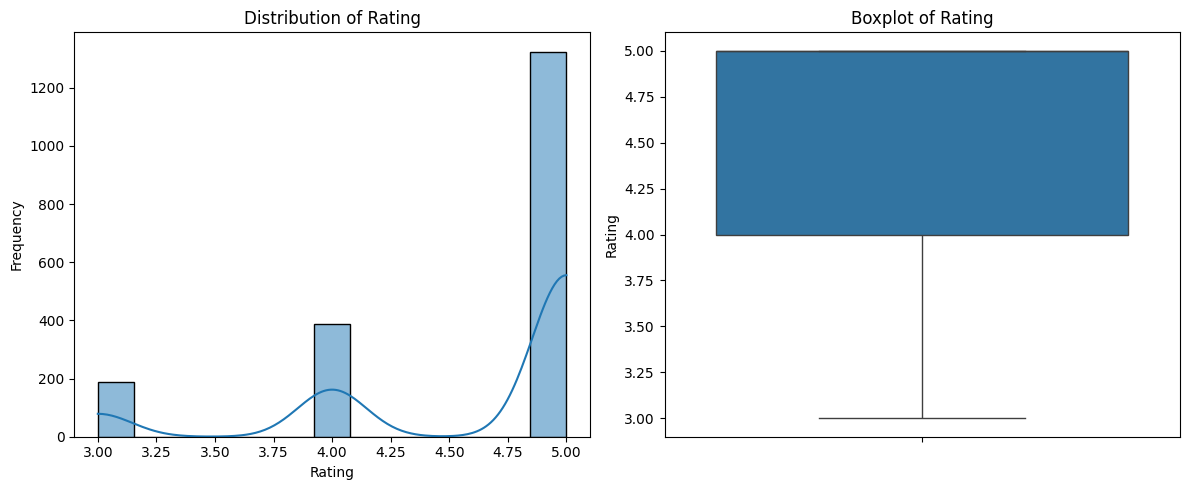

/tmp/ipython-input-3984637710.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_10_restaurants)], y=col, order=top_10_restaurants, palette='viridis')


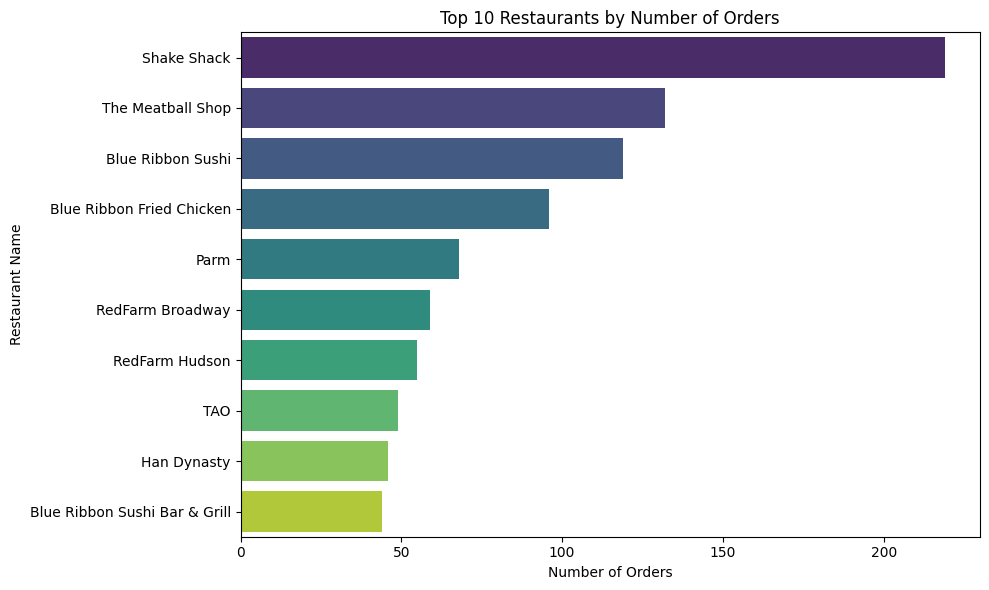

/tmp/ipython-input-3984637710.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


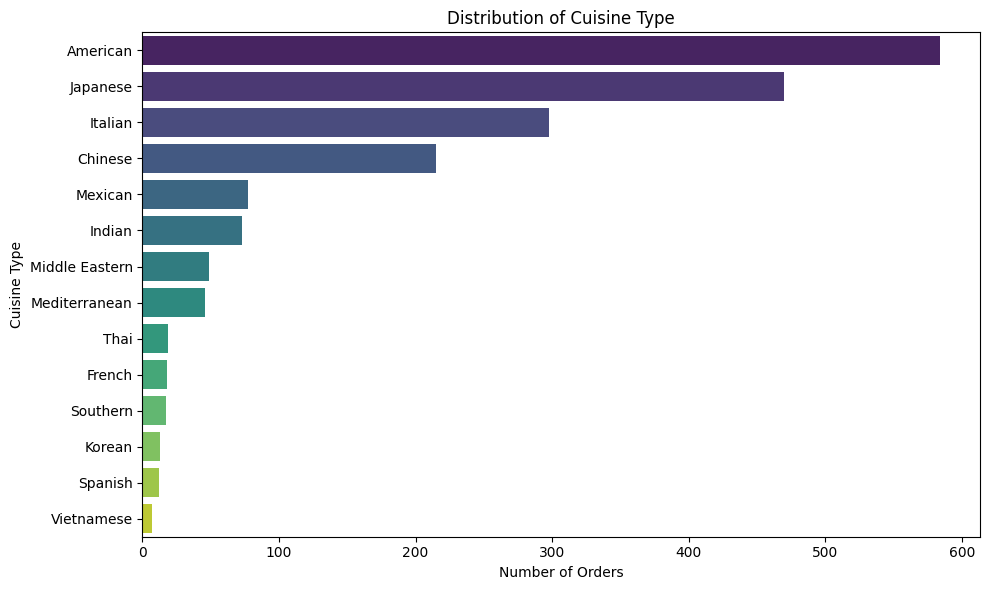

/tmp/ipython-input-3984637710.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


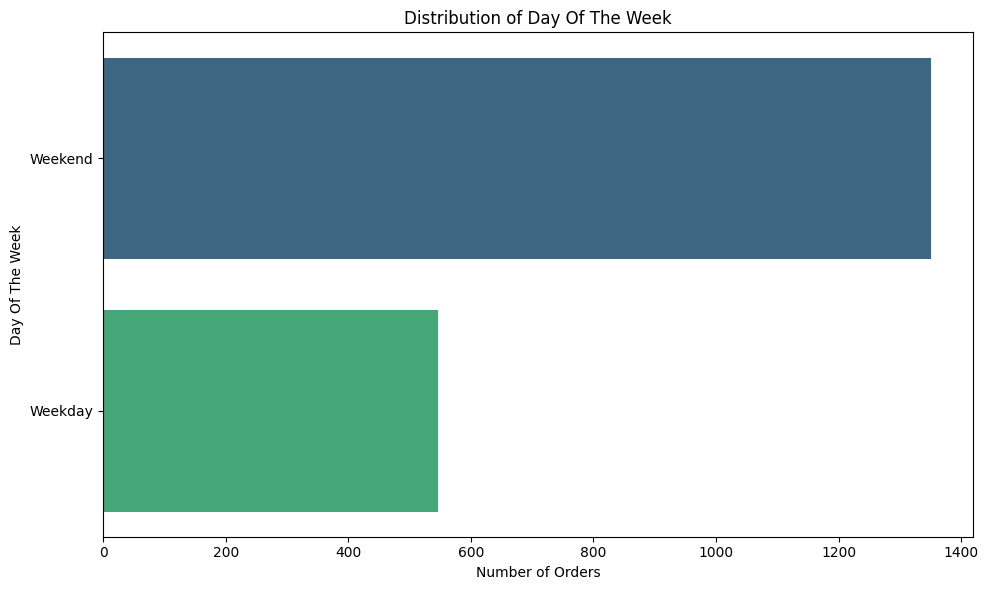

In [12]:
# Write the code here
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title() + (' (minutes)' if 'time' in col else ''))
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col.replace("_", " ").title()}')
    plt.ylabel(col.replace("_", " ").title() + (' (minutes)' if 'time' in col else ''))

    plt.tight_layout()
    plt.show()


# Explore Categorical Variables
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if col == 'restaurant_name':
        # Way too many , just Get top 10 for restaurants
        top_10_restaurants = df[col].value_counts().head(10).index
        sns.countplot(data=df[df[col].isin(top_10_restaurants)], y=col, order=top_10_restaurants, palette='viridis')
        plt.title(f'Top 10 Restaurants by Number of Orders')
        plt.xlabel('Number of Orders')
        plt.ylabel(col.replace("_", " ").title())
    else:
        sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel('Number of Orders')
        plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


**Observations on numerical values**

1. Cost of the Order (cost_of_the_order):

Distribution: The histogram shows a right-skewed distribution, indicating that most orders have a lower cost, with fewer orders having higher costs. The peak of the distribution appears to be around the 12− 15 range. Central Tendency and Spread: The boxplot confirms the right skewness, with the median likely around 15

2. Food Preparation Time (food_preparation_time):

Distribution: The histogram shows a relatively uniform distribution across the range, with slight peaks around 25-30 minutes. It does not appear to be strongly skewed. Central Tendency and Spread: The boxplot indicates a median food preparation time of around 27-28 minutes. The data points are fairly spread out, with no prominent outliers. Range: Preparation times generally range from 20 to 35 minutes.

3. Delivery Time (delivery_time):

Distribution: The histogram shows a somewhat normal-like distribution, slightly right-skewed, with a clear peak around 20-25 minutes. Most delivery times are concentrated in this range. Central Tendency and Spread: The boxplot shows the median delivery time is around 24 minutes. There are some outliers on the higher side, indicating a few longer delivery times. Range: Delivery times mostly fall between 15 and 35 minutes.

4. Rating (rating):

Distribution: The histogram clearly shows that the majority of orders received a rating of 5, followed by 4, and then 3. This is a discrete, categorical-like numerical variable. Central Tendency and Spread: The boxplot is less informative for this type of discrete data but confirms the dominance of 5-star ratings, indicating a highly positively skewed distribution. There are no outliers as the values are fixed at 3, 4, and 5. Range: Ratings are exclusively 3, 4, or 5, with 5 being the most frequent.

**Observations on Categorical values**

1. Restaurant Name (restaurant_name):

Top Restaurants: The countplot clearly shows the top 10 restaurants by the number of orders. 'Shake Shack' is the most popular, followed by 'The Meatball Shop' and 'Blue Ribbon Sushi'. Distribution: There is a significant drop-off in order volume after the top few restaurants, indicating a skewed distribution where a small number of restaurants account for a large portion of orders.

2. Cuisine Type (cuisine_type):

Popular Cuisines: 'American' cuisine is by far the most popular, followed by 'Japanese' and 'Italian'. Variety: The dataset includes a wide variety of cuisine types, but a few dominate the order count, showing customer preference for certain types of food.

3. Day of the Week (day_of_the_week):

Order Frequency: The countplot reveals that orders are significantly higher on 'Weekend' days compared to 'Weekday' days. Trend: This indicates a clear pattern of increased food delivery demand during weekends, likely due to people having more leisure time or being less

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
# Write the code here
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants in terms of the number of orders received:")
display(top_5_restaurants)

Top 5 restaurants in terms of the number of orders received:


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Shake Shack got the most orders (219)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [14]:
# Write the code here
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
#Top Cuisine in filtered weekend dataset
popular_weekend_cuisine = weekend_orders['cuisine_type'].value_counts().head(1)
display(popular_weekend_cuisine)

,count
cuisine_type,
American,415


#### Observations:
American is the popular cuisine on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [15]:
# Write the code here
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (len(orders_above_20) / len(df)) * 100
print("Percent orders above 20 is {}".format(percentage_above_20))

Percent orders above 20 is 29.24130663856691


#### Observations:
Percent orders above 20 is 29.24130663856691

### **Question 10**: What is the mean order delivery time? [1 mark]

In [16]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
Mean order delivery time: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [17]:
# Write the code here
top_3_customers = df['customer_id'].value_counts().head(3)
print ("Top 3 customers with most orders with order count:")
display(top_3_customers)

Top 3 customers with most orders with order count:


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Top 3 customers are 52832, 47440 and 83287 with respective oreder count of 13 , 10 and 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


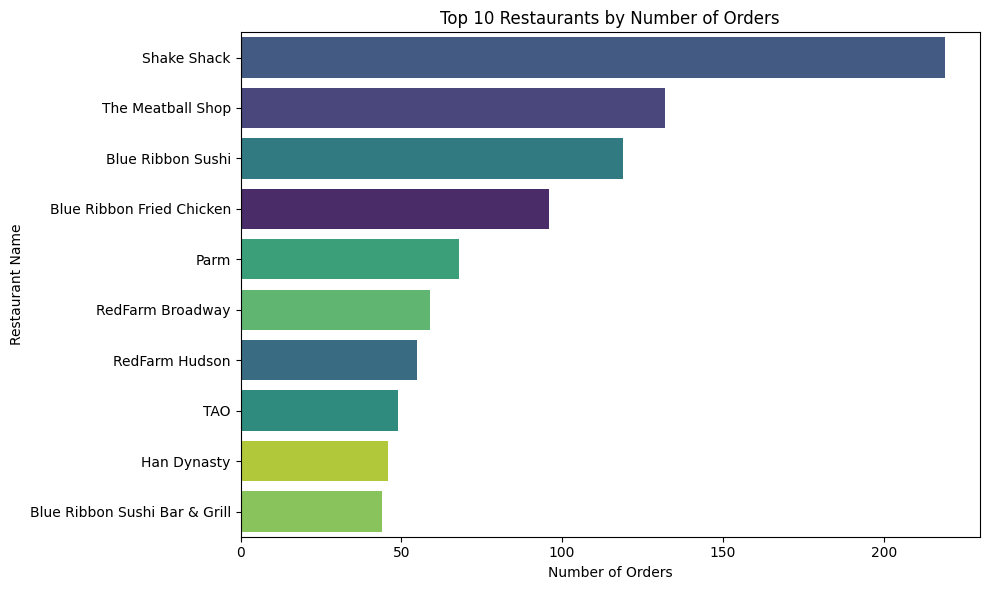

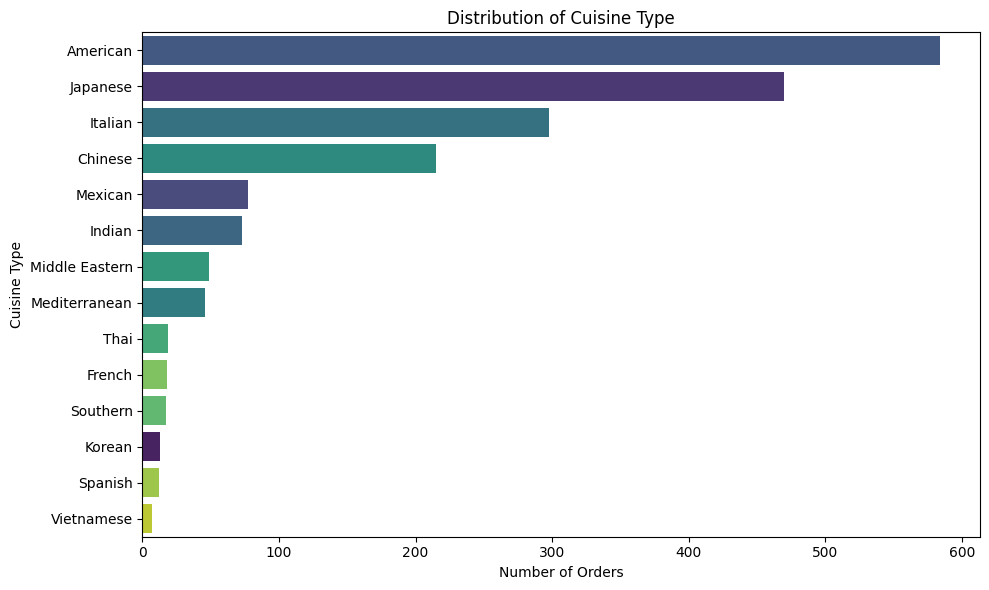

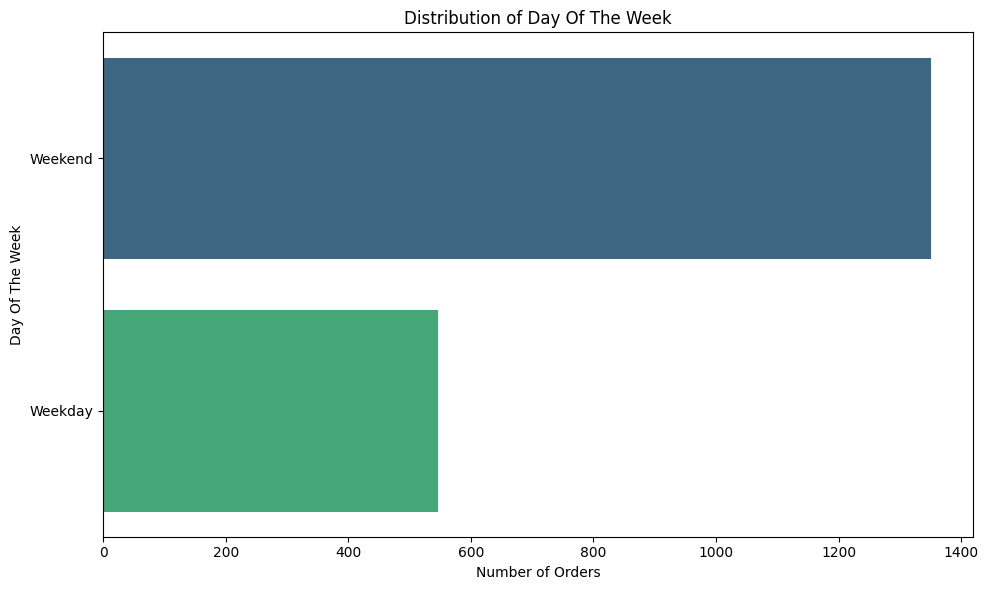

In [25]:
# Write the code here

## Correlation Heatmap for Numerical Variables

categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if col == 'restaurant_name':
        # Get top 10 restaurants
        top_10_restaurants = df[col].value_counts().head(10).index
        sns.countplot(data=df[df[col].isin(top_10_restaurants)], y=col, order=top_10_restaurants, hue=col , palette='viridis')
        plt.title(f'Top 10 Restaurants by Number of Orders')
        plt.xlabel('Number of Orders')
        plt.ylabel(col.replace("_", " ").title())
    else:
        sns.countplot(data=df, y=col, palette='viridis', hue=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel('Number of Orders')
        plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

**Observations from Heatmap for Numerical Variables**
Looking at the heatmap most of the non-diagonal cells are very light in color and have values very close to 0 (e.g., 0.04, -0.03, 0.01, 0.00).

This indicates that for our dataset, there is a very weak or negligible linear relationship between cost_of_the_order, food_preparation_time, delivery_time, and rating. For example, a higher cost of an order doesn't strongly predict a longer or shorter delivery time, nor does it necessarily correlate with a better or worse rating.

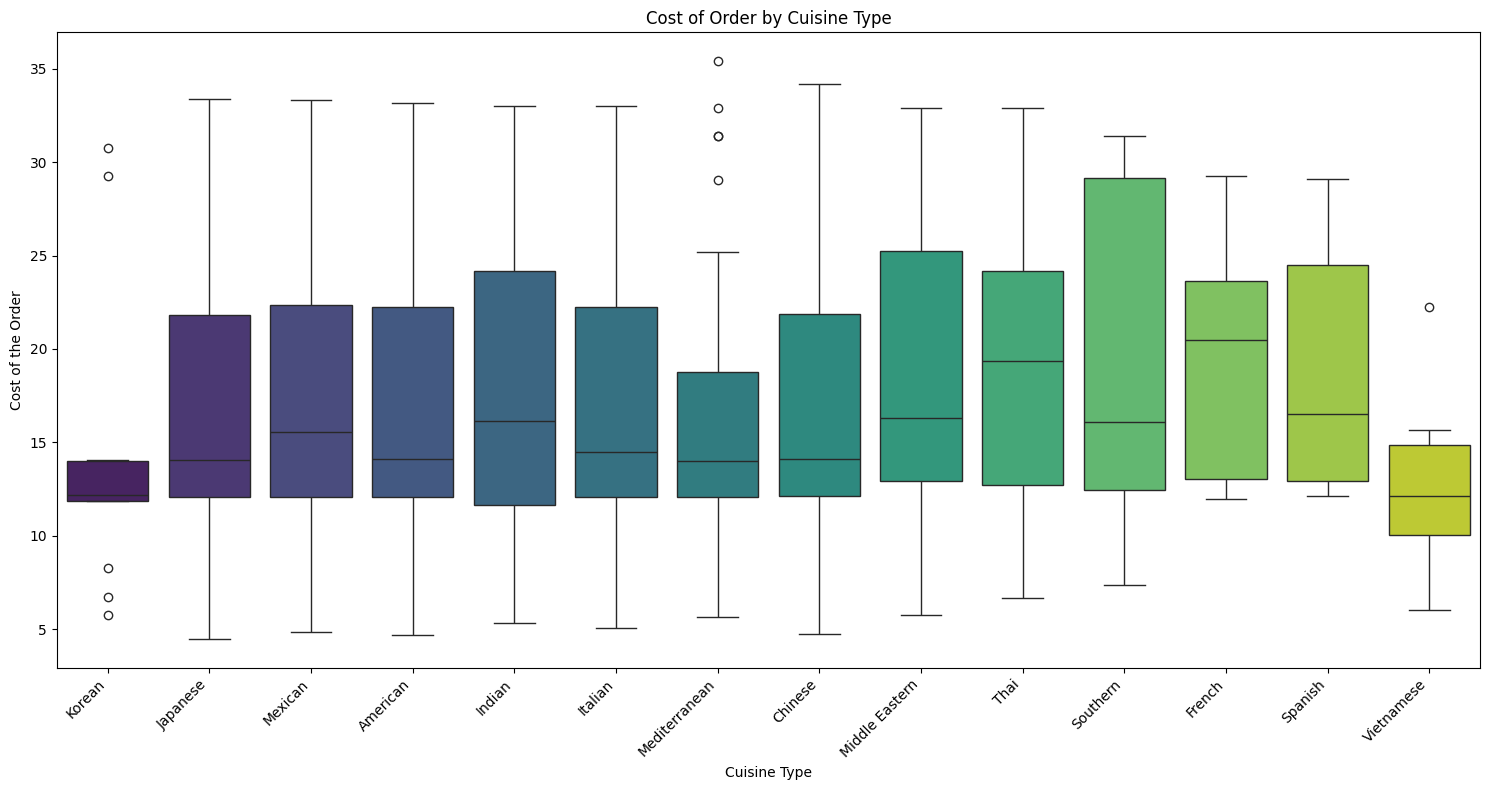

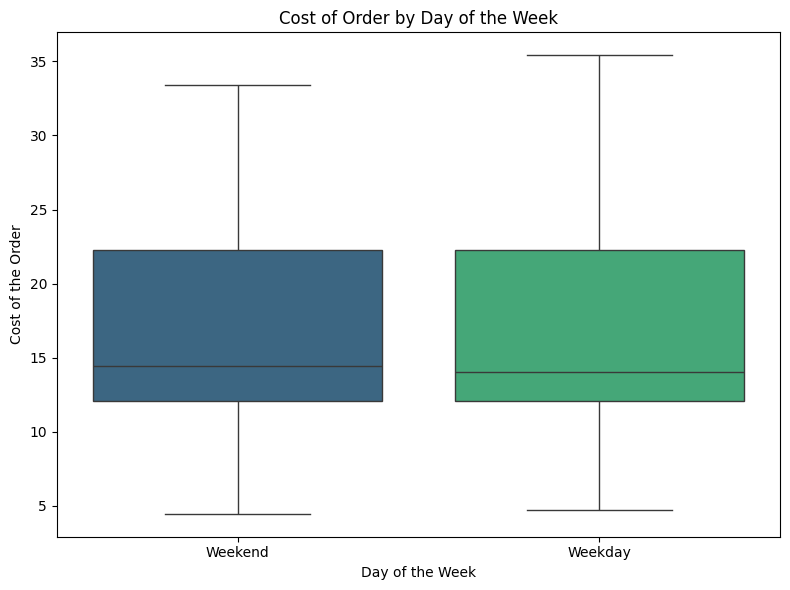

In [28]:
## Box Plots: Cost by Cuisine and Day of week


plt.figure(figsize=(15, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', data=df, palette='viridis', legend=False)
plt.title('Cost of Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', hue='day_of_the_week', data=df, palette='viridis', legend=False)
plt.title('Cost of Order by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.tight_layout()
plt.show()

**Observations : Box Plots: Cost by Cuisine and Day of week**

1. Cost of Order by Cuisine Type (cuisine_type):

Distribution: The box plot shows that the median cost_of_the_order varies across different cuisine_types. Some cuisines like 'French' appear to have higher median order costs compared to others like 'Mediterranean' or 'Middle Eastern'. Spread and Outliers: There is a considerable spread in order costs within many cuisine types, indicated by the length of the boxes. Several cuisines also show outliers, especially on the higher end, suggesting that while most orders for a particular cuisine might be within a certain range, there are occasional much more expensive orders. Specific Cuisines: 'Japanese' and 'American' cuisines, while popular in terms of order volume, show a wide range of costs with several high-cost outliers.

2. Cost of Order by Day of the Week (day_of_the_week):

Distribution: The box plot indicates that the median cost_of_the_order is very similar for both 'Weekday' and 'Weekend' orders. This suggests that the cost of orders doesn't significantly change based on whether it's a weekday or a weekend. Spread and Outliers: The spread of order costs (interquartile range) is also comparable between weekdays and weekends. Both categories exhibit several high-cost outliers, meaning expensive orders occur on both weekdays and weekends. Consistency: The similarity in cost distribution suggests that customer spending habits per order remain relatively consistent regardless of the day of the week

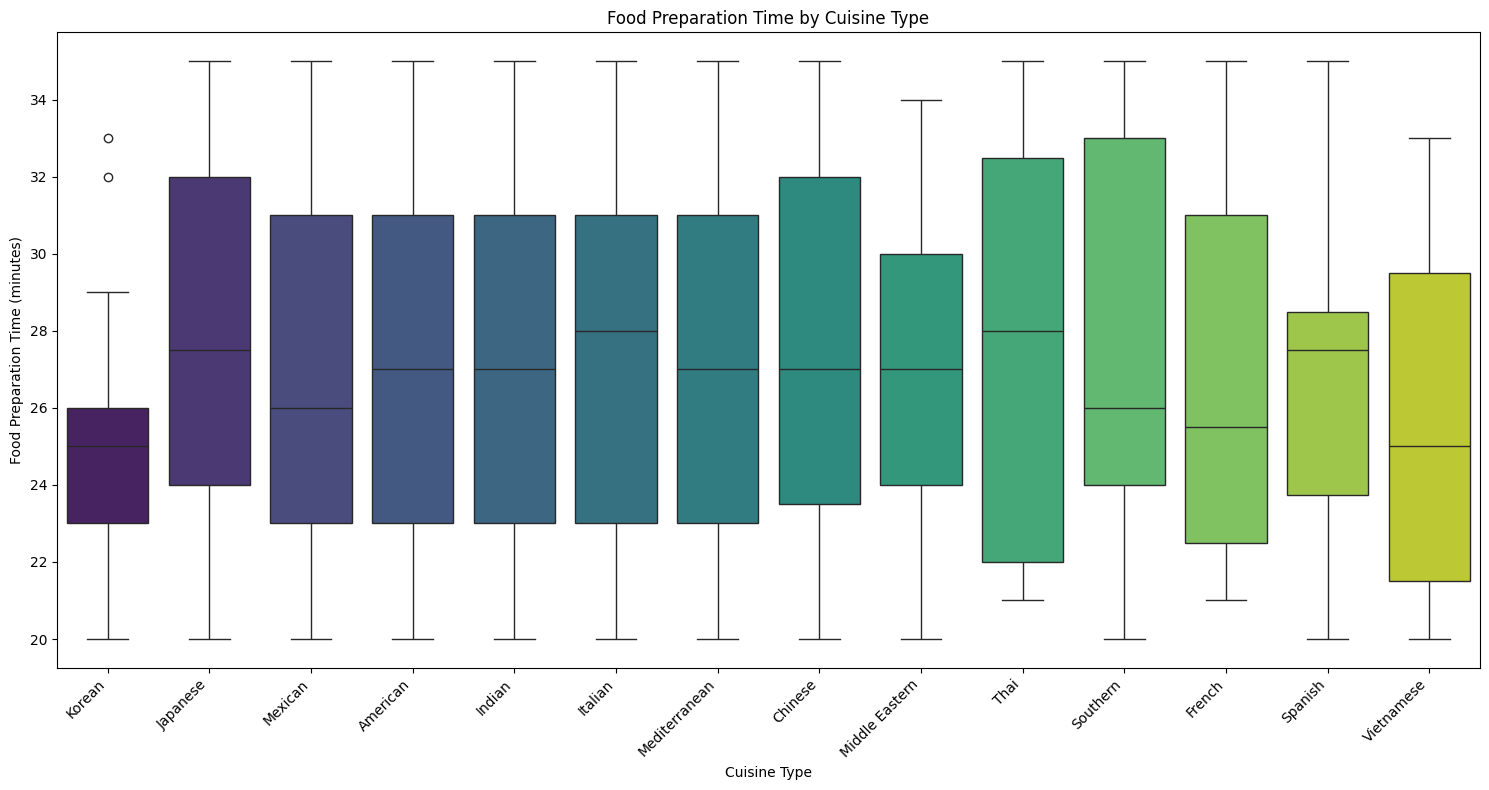

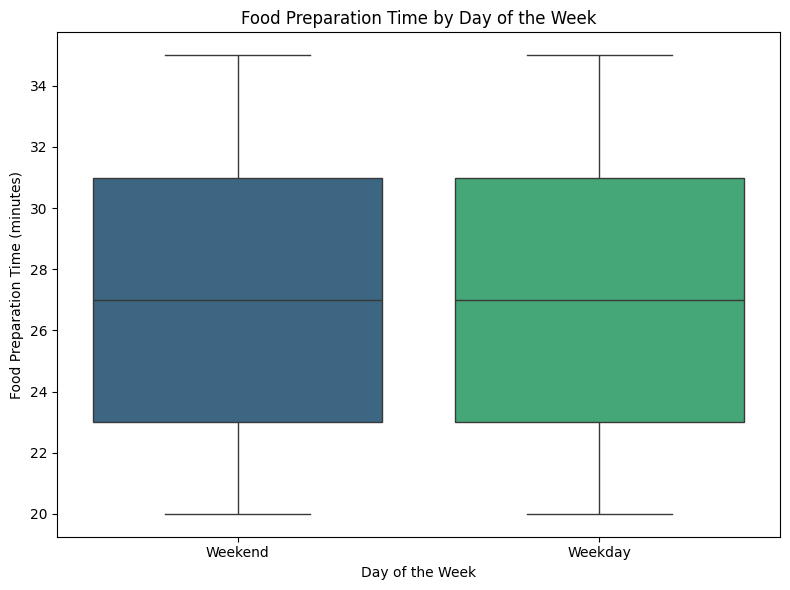

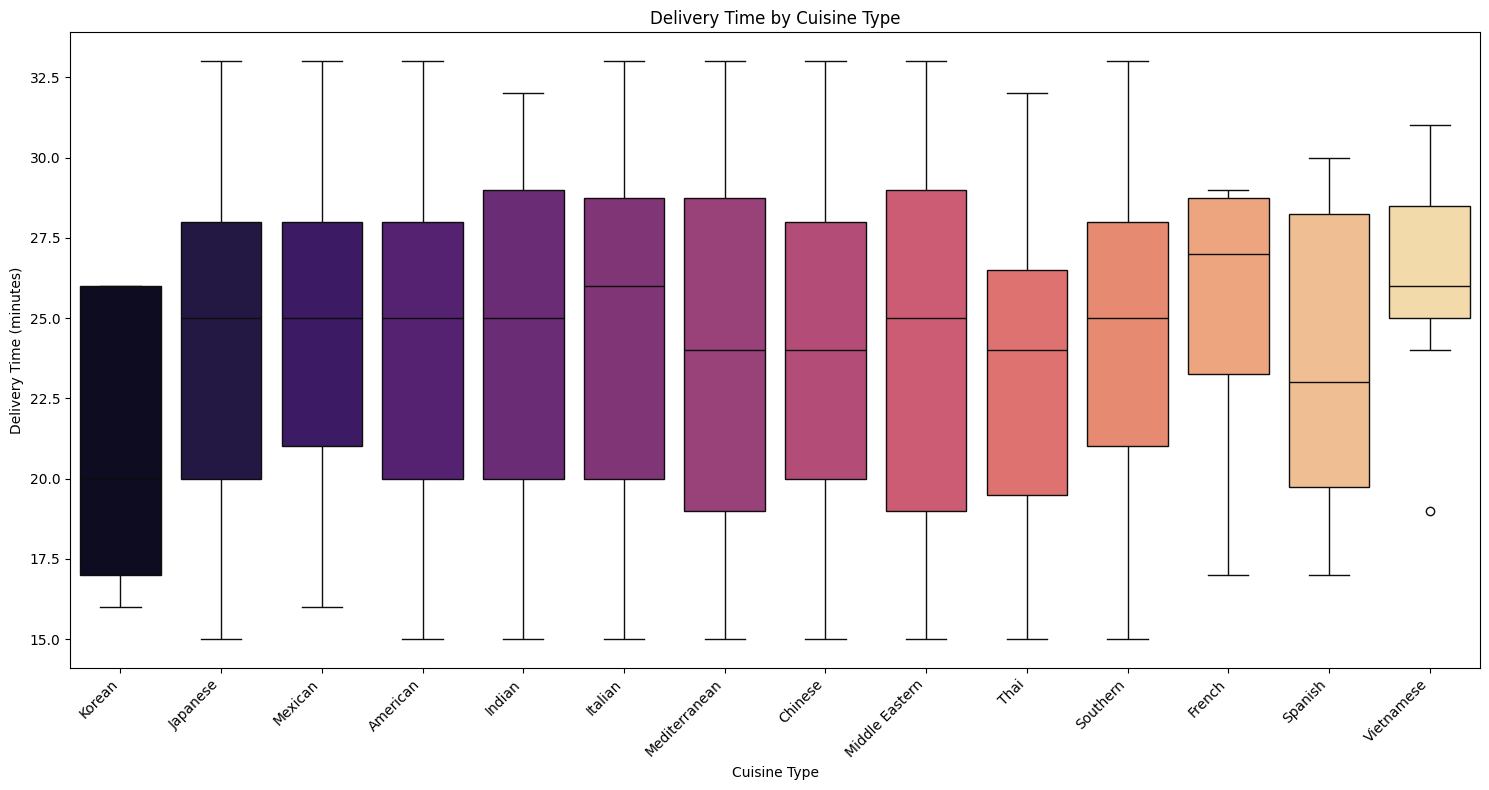

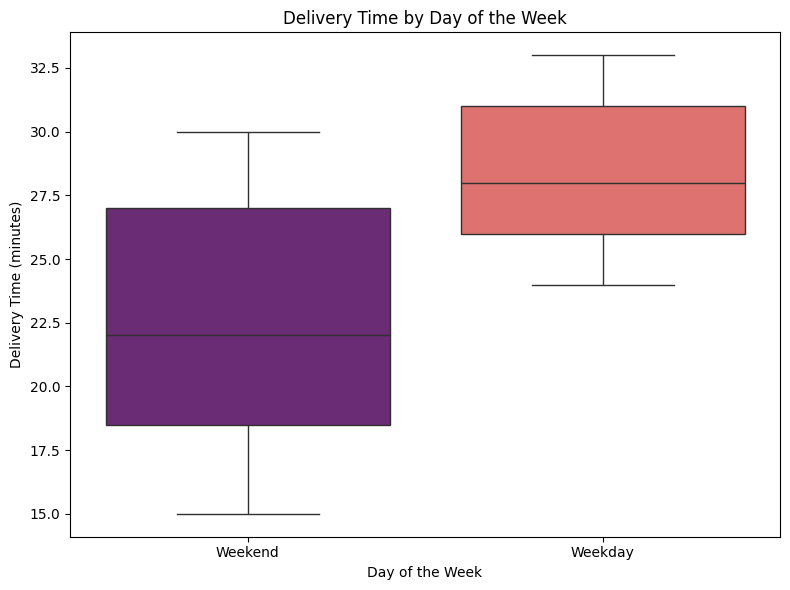

In [20]:
## box plots to analyze the relationships between 'food_preparation_time', 'delivery_time' and categorical variables 'cuisine_type' and 'day_of_the_week'.

plt.figure(figsize=(15, 8))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='viridis', hue='cuisine_type', legend=False)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df, palette='viridis', hue='day_of_the_week', legend=False)
plt.title('Food Preparation Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time (minutes)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df, palette='magma', hue='cuisine_type', legend=False)
plt.title('Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='magma', hue='day_of_the_week', legend=False)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

**Observations of Box plot box plots -- 'food_preparation_time', 'delivery_time' and categorical variables 'cuisine_type' and 'day_of_the_week'.**

1. Food Preparation Time by Cuisine Type (cuisine_type):

Distribution: The box plot shows that food_preparation_time is relatively consistent across most cuisine types, with medians hovering around 27-28 minutes. This suggests that the time taken to prepare food does not significantly vary by cuisine type. Spread and Outliers: There are no significant outliers or extreme variations in preparation time for any specific cuisine, indicating that restaurants generally maintain similar preparation efficiency regardless of the cuisine they offer.

2. Food Preparation Time by Day of the Week (day_of_the_week):

Distribution: The median food_preparation_time is nearly identical for both 'Weekday' and 'Weekend' orders. This indicates that restaurants' food preparation processes are consistent throughout the week, without noticeable changes in efficiency or speed on busier weekend days. Spread and Outliers: The spread of preparation times is also similar between weekdays and weekends, with no significant outliers, reinforcing the idea of consistent operational efficiency.

3. Delivery Time by Cuisine Type (cuisine_type):

Distribution: The delivery_time also appears to be relatively consistent across different cuisine_types, with most medians falling around 23-25 minutes. This suggests that the type of cuisine ordered does not heavily influence the delivery duration. Spread and Outliers: While most delivery times are similar, some cuisines show a slightly wider interquartile range (e.g., 'American', 'Japanese'), and occasional outliers on the higher end, indicating that some deliveries for these cuisines can take longer than average. However, no cuisine type stands out as consistently having significantly longer or shorter delivery times.

4. Delivery Time by Day of the Week (day_of_the_week):

Distribution: The median delivery_time is quite similar for both 'Weekday' and 'Weekend' orders. This indicates that delivery logistics and traffic conditions might not significantly impact the average delivery time differently between weekdays and weekends, or that the delivery system is robust enough to handle varying order volumes. Spread and Outliers: Both weekdays and weekends exhibit a similar spread of delivery times and some high-end outliers, suggesting that occasional longer deliveries occur irrespective of the day.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [21]:
# Write the code here

# Calculate the count of ratings for each restaurant
rating_counts_by_rest = df.groupby('restaurant_name')['rating'].count()
#display(rating_counts)
# Calculate the average rating for each restaurant
average_ratings_by_rest = df.groupby('restaurant_name')['rating'].mean()
#display(average_ratings)
# Combine into a single DataFrame for easier filtering
restaurant_with_ratingcount_and_averagerating = pd.DataFrame({
    'rating_count': rating_counts_by_rest,
    'average_rating': average_ratings_by_rest
})

#display(restaurant_stats)

# Filter for restaurants fulfilling the criteria
fuilfilling_restaurants = restaurant_with_ratingcount_and_averagerating[
    (restaurant_with_ratingcount_and_averagerating['rating_count'] > 50) &
    (restaurant_with_ratingcount_and_averagerating['average_rating'] > 4)
]

print("Restaurants qualifying/fulfilling thr conditiond for  the promotional offer:")
display(fuilfilling_restaurants)

Restaurants qualifying/fulfilling thr conditiond for  the promotional offer:


,rating_count,average_rating
restaurant_name,,
Blue Ribbon Fried Chicken,96,4.552083
Blue Ribbon Sushi,119,4.521008
Parm,68,4.500000
RedFarm Broadway,59,4.474576
RedFarm Hudson,55,4.490909
Shake Shack,219,4.561644
The Meatball Shop,132,4.689394


#### Observations:
Creating 2 series objects for rating_counts and avg rating makes it easier to build a new dataframe to filter qualifying restaurants

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [22]:
# Write the code here

# Function to calculate revenue conditionally
def revenue(row):
    cost = row['cost_of_the_order']
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0  # No commission for orders <= 5 dollars

# Apply the function on each row  to create a new 'revenue' column
df['revenue'] = df.apply(revenue, axis=1)

# Calculate the net revenue (sum of all commissions)
net_revenue = df['revenue'].sum()

print(f"The net revenue generated by the company across all orders is: ${net_revenue:.2f}")



The net revenue generated by the company across all orders is: $6166.30


#### Observations:
The net revenue generated by the company across all orders is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [23]:
# Write the code here

# Calculate the total time taken for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders where total time is more than 60 minutes
orders_over_60_min = df[df['total_time'] > 60]
num_orders_over_60_min = len(orders_over_60_min)

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage
percentage_over_60_min = (num_orders_over_60_min / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes to be delivered: {percentage_over_60_min:.2f}%")

Percentage of orders taking more than 60 minutes to be delivered: 10.54%


#### Observations:
Percentage of orders taking more than 60 minutes to be delivered: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [24]:
# Write the code here
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time by day of the week:")
display(mean_delivery_time_by_day)

Mean delivery time by day of the week:


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The mean time to deliver during weekdays is more than weekend

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Based on the heat map there is no strong positive or negative correlation indicating that, for instance, a higher cost of order leads to a longer delivery time or a better rating.
* The median cost_of_the_order is remarkably similar for both 'Weekday' and 'Weekend' orders.
* Food prep and delivery times are largely consistent across all cuisine types and there is no variability over a weekend or wekday


### Recommendations:
*  The weekday delivery times can be improved on average for better experience and improve business  
*  Factors like cost, preparation time, and delivery time do not seem to directly or strongly influence customer ratings based on the data. Other qualitative aspects (food quality, order accuracy, customer service interaction) might need to be considered for better business


---